In [53]:
modelPath = "Clickbait"
checkpoint = "bert-base-cased"
                                              # "cmarkea/distilcamembert-base-sentiment"
                                              # "cmarkea/distilcamembert-base" (accuracy=0,69)
                                              # "camembert-base"
                                              # "microsoft/Multilingual-MiniLM-L12-H384" (accuracy=0,64)
                                              # "nlptown/bert-base-multilingual-uncased-sentiment"
                                              # "distilbert-base-uncased-finetuned-sst-2-english"
                                              # "bert-base-uncased"
problem_type =  "regression"                  # Possible values: "regression", "single_label_classification", "multi_label_classification"
num_labels = 1                                # 5
dataCuratedPath = "Data/Curated"              # Donn√©es pour tous les sites du 1er janvier 2021 au 30 avril 2021
                                              # Donn√©es juste pour le site "Actualit√©s, trucs et astuces" entre le 1er mai et le 31 juillet 2021.
                                              # Les colonnes sont les suivantes, s√©par√©es par des ";" :
                                              #    Page name;Title;Publish time;People Reached;Link Clicks
actualOutput = 'truthMean'
computedOutput = "labelC"
inputColumn = 'postText'
removeColumns = ['postText', 'targetTitle', 'targetDescription', 'id', 'truthMean'] # Il faut enlever les colonnes de type texte
splitFactor = 0.2                             # Proportion de donn√©es r√©serv√©es pour les tests
push_to_hub = False
learning_rate = 5e-5
weight_decay=0.01

In [2]:
import torch
import numpy as np

In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(
   checkpoint,
   problem_type=problem_type,
   num_labels = num_labels)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [4]:
print(tokenizer("Bonjour, comment √ßa va ?"))
print(tokenizer.tokenize("Hello, how are you?"))
print(tokenizer.encode("Bonjour, comment √ßa va ?"))
print(tokenizer.convert_tokens_to_ids(tokenizer.tokenize("Bonjour, comment √ßa va ?")))
print(tokenizer.convert_ids_to_tokens(tokenizer.encode("Bonjour, comment √ßa va ?")))
print(tokenizer.decode(tokenizer.encode("Bonjour, comment √ßa va ?")))

{'input_ids': [101, 17182, 25028, 1197, 117, 7368, 253, 1161, 191, 1161, 136, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
['Hello', ',', 'how', 'are', 'you', '?']
[101, 17182, 25028, 1197, 117, 7368, 253, 1161, 191, 1161, 136, 102]
[17182, 25028, 1197, 117, 7368, 253, 1161, 191, 1161, 136]
['[CLS]', 'Bon', '##jou', '##r', ',', 'comment', '√ß', '##a', 'v', '##a', '?', '[SEP]']
[CLS] Bonjour, comment √ßa va? [SEP]


In [5]:
import datasets as ds

In [6]:
curated = ds.load_from_disk(dataCuratedPath)

In [7]:
curated.to_pandas()

postText  \
0      Panama Papers: Europol links 3,500 names to su...   
1                    The key to truly great chicken soup   
2      Afghan policewomen face down their fears to serve   
3      Conservatives are watching less football this ...   
4      Richard Sherman weighs in on Cam Newton‚Äôs stru...   
...                                                  ...   
21907  Man who received world's first penis transplan...   
21908  RT @NYTSports: Abby didn't start, team couldn'...   
21909  Obama defends Affordable Care Act ahead of Sup...   
21910  New study of the Deflategate report concludes ...   
21911  Netflix secures rights to Brad Pitt Afghanista...   

                                             targetTitle  \
0      Panama Papers: Europol links 3,500 names to su...   
1                               A Superior Chicken Soup    
2      100 Women 2016: On the frontline with the wome...   
3      Older Viewers and Conservatives Are Watching L...   
4      Seattle Seahawks Richard Sherman Says 'Karma' ...   
...                                                  ...   
21907  World's first penis transplant patient is set ...   
21908  At Women‚Äôs World Cup, Tie Leaves U.S. on Solid...   
21909  Obama Defends Health Law Ahead of Supreme Cour...   
21910                           Deflating ‚ÄòDeflategate‚Äô    
21911  Brad Pitt to Star in Netflix Film About Afghan...   

                                       targetDescription  truthMean  \
0      Law enforcement agency analysis uncovers proba...   0.066667   
1      For the best rendition of this American classi...   0.733333   
2       The Afghan women risking all to join the police.   0.333333   
3      Many factors are dragging down NFL ratings, in...   0.066667   
4      Seattle Seahawks news, rumors, scores, schedul...   0.133333   
...                                                  ...        ...   
21907  Surgeons at Stellenbosch University, who carri...   0.600000   
21908  With Abby Wambach not starting for the first t...   0.266667   
21909  President Obama talks at the G7 summit in Germ...   0.400000   
21910  A new study weakens the case against the Patri...   0.400000   
21911  In a coup for Netflix, the star will star as f...   0.133333   

                       id  
0      804113781580328960  
1      804119512010424320  
2      804121272967983104  
3      804123103995580416  
4      804126501117435904  
...                   ...  
21907  609056814819323905  
21908  610125815116865536  
21909  608338587495628801  
21910  609684420082180096  
21911  608392385425338368  

[21912 rows x 5 columns]

In [8]:
longueur= len(curated)
longueur

21912

In [9]:
trie=sorted(curated[actualOutput])

In [10]:
import matplotlib.pyplot as plt

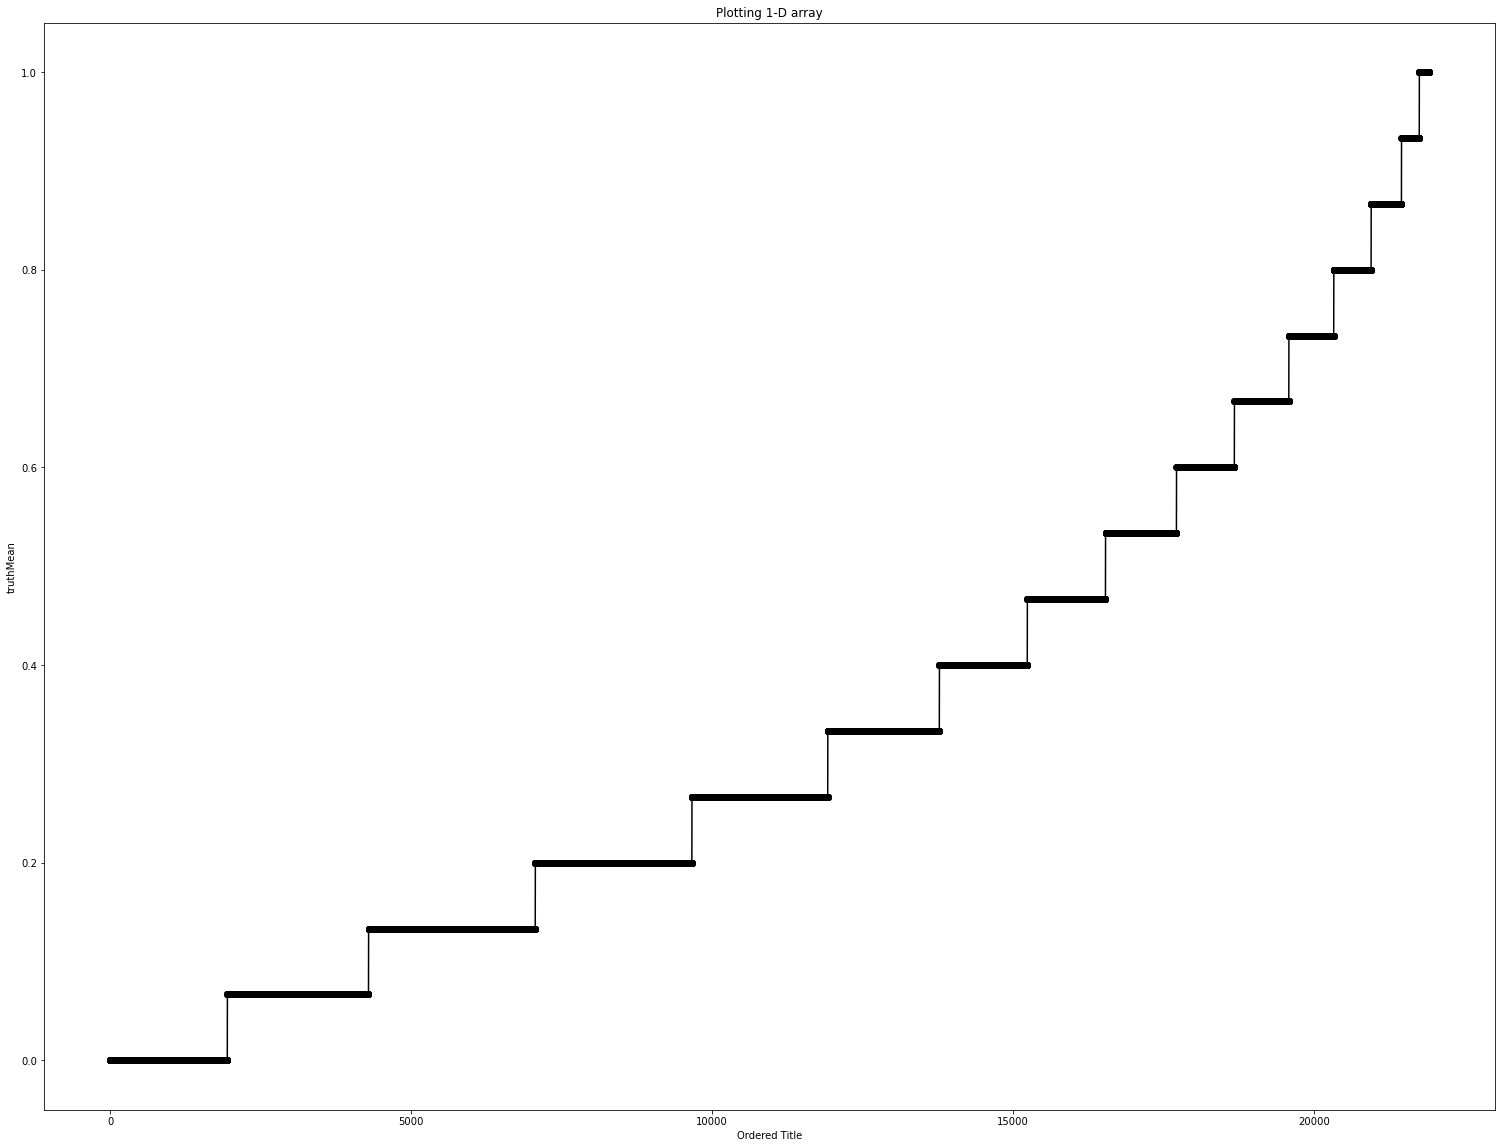

In [11]:
plt.figure(figsize=(26, 20))
plt.title("Plotting 1-D array")
plt.xlabel("Ordered Title")
plt.ylabel(actualOutput)
x = np.array(range(0, longueur))
y = np.array(trie)
plt.plot(x, y, color = "black", marker = "o", label = "Array elements")

In [12]:
ncf=[None] * (num_labels-1)
for i in range(num_labels-1):
    ncf[i] = trie[longueur * (i+1) // num_labels]
ncf

[]

In [13]:
def tokenize(sample):
    tokenized_sample = tokenizer(
            sample[inputColumn],   #  postText + ". Paru dans " + sample["Page name"], #+ ", le " + sample["Publish time"]
            # str(int(sample[LCfraction]*100)), # on donne direct le r√©sultat pour voir si accuracy == 1
            #padding=True,
            #truncation=True,
            #max_length=30
            )

    fraction = sample[actualOutput]
    
    if num_labels == 1:
        tokenized_sample["labels"] = fraction
    else:
        tokenized_sample["labels"] = next((x for x, val in enumerate(ncf) if fraction < val), num_labels-1)
    
    
    # print( fraction, tokenized_sample["input_ids"], tokenized_sample["labels"], sample[inputColumn])
    
    return tokenized_sample

In [14]:
tokenized_curated = curated.map(tokenize) #, batched=True)

Loading cached processed dataset at Data/Curated\cache-132331471e51f6bf.arrow


In [15]:
tokenized_curated

Dataset({
    features: ['postText', 'targetTitle', 'targetDescription', 'truthMean', 'id', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 21912
})

In [16]:
tokenized_curated.to_pandas().describe()

truthMean        labels
count  21912.000000  21912.000000
mean       0.327942      0.327942
std        0.250260      0.250260
min        0.000000      0.000000
25%        0.133333      0.133333
50%        0.266667      0.266667
75%        0.466667      0.466667
max        1.000000      1.000000

In [17]:
print(tokenized_curated[0:3])

{'postText': ['Panama Papers: Europol links 3,500 names to suspected criminals', 'The key to truly great chicken soup', 'Afghan policewomen face down their fears to serve'], 'targetTitle': ['Panama Papers: Europol links 3,500 names to suspected criminals', 'A Superior Chicken Soup ', '100 Women 2016: On the frontline with the women policing the peace in Afghanistan'], 'targetDescription': ['Law enforcement agency analysis uncovers probable matches connected to terrorism, money laundering and organised crime', 'For the best rendition of this American classic, start with a whole bird.', 'The Afghan women risking all to join the police.'], 'truthMean': [0.06666666666, 0.73333333332, 0.33333333330000003], 'id': ['804113781580328960', '804119512010424320', '804121272967983104'], 'input_ids': [[101, 8392, 19023, 131, 11854, 23043, 6743, 124, 117, 2260, 2666, 1106, 6321, 13037, 102], [101, 1109, 2501, 1106, 5098, 1632, 9323, 13128, 102], [101, 13099, 2021, 12821, 2354, 1339, 1205, 1147, 10434

In [18]:
tokenized_curated2 = tokenized_curated.train_test_split(splitFactor) # 0.2

In [19]:
tokenized_curated2['train'].to_pandas()

postText  \
0      A contestant on The Jump has already been forc...   
1      A max deal for...Jrue Holiday? That's how craz...   
2      Leah Remini's Reddit AMA reveals juicy secrets...   
3      This is how @imVkohli won #MichaelClarke's hea...   
4         'Pain in my soul': Russia mourns plane victims   
...                                                  ...   
17524        Finally, proof that not all cats are jerks.   
17525  All NCAA Tournament games will be available on...   
17526  WATCH LIVE: Attorneys of United Airlines passe...   
17527  See Harry Styles hanging from a helicopter on ...   
17528  A.J. Francis, a 6-foot-5, 330-lb Miami Dolphin...   

                                             targetTitle  \
0      The Jump 2017 claims first casualty as Vogue W...   
1      The 10 NBA Free Agents Most Likely to Be Overp...   
2      Leah Remini's Reddit AMA reveals juicy secrets...   
3      This Is How Virat Kohli Won Michael Clarke's H...   
4           Russia mourns as search for bodies continues   
...                                                  ...   
17524  One kitty's cuddly nature proves that not all ...   
17525  How to watch today's March Madness 2017 NCAA t...   
17526  Watch Live: Briefing with Attorneys of United ...   
17527  Harry Styles Hangs From a Helicopter on 'Sign ...   
17528  A.J. Francis, Miami Dolphins defensive tackle,...   

                                       targetDescription  truthMean  \
0      Since it began in 2014, The Jump has made a na...   0.266667   
1      With another salary-cap spike on the way this ...   0.600000   
2      Leah Remini, author of 'Troublemaker: Survivin...   0.533333   
3      Former Aussie skipper Michael Clarke has words...   0.533333   
4      A huge search operation is continuing for a Ru...   0.200000   
...                                                  ...        ...   
17524  Twitter user @fish_size tweeted a picture in w...   0.533333   
17525  Round two of the NCAA basketball tournament st...   0.400000   
17526  Attorneys and a family member for Dr. David Da...   0.600000   
17527  As if the stakes weren't high enough already f...   0.200000   
17528  Dolphins reserve DT A.J. Francis is under cont...   0.333333   

                       id                                          input_ids  \
0      828280526616145921  [101, 138, 11201, 1113, 1109, 18454, 1144, 164...   
1      841715429135532034  [101, 138, 12477, 1775, 2239, 1111, 119, 119, ...   
2      804133678003666946  [101, 14809, 11336, 25685, 112, 188, 2156, 179...   
3      842058017499680769  [101, 1188, 1110, 1293, 137, 13280, 2559, 2718...   
4      813409889355759616  [101, 112, 13304, 1107, 1139, 3960, 112, 131, ...   
...                   ...                                                ...   
17524  851495511517474816  [101, 4428, 117, 6777, 1115, 1136, 1155, 11771...   
17525  843818164756631552  [101, 1398, 5089, 5629, 1638, 1209, 1129, 1907...   
17526  852537522945220609  [101, 22751, 9481, 3048, 149, 26140, 131, 6867...   
17527  849403739664527361  [101, 3969, 3466, 27881, 5205, 1121, 170, 7948...   
17528  608310131734872064  [101, 138, 119, 147, 119, 3720, 117, 170, 127,...   

                                          token_type_ids  \
0      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
...                                                  ...   
17524            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
17525  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
17526  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
17527  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
17528  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                          attention_mask    labels  
0 

In [20]:
tokenized_curated3 = tokenized_curated2.remove_columns(removeColumns)

In [21]:
tokenized_curated4 = tokenized_curated3

In [22]:
tokenized_curated4

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 17529
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 4383
    })
})

In [24]:
from datasets import load_metric
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
def compute_metrics(eval_preds):
    logits, labels = eval_preds
    if num_labels == 1:
        metric = load_metric("mse")
        return metric.compute(predictions=logits, references=labels)
    elif num_labels == 2:
        predictions = np.argmax(logits, axis=-1)
        accuracy = accuracy_score(y_true=labels, y_pred=predictions)
#    recall = recall_score(y_true=labels, y_pred=predictions)
#    precision = precision_score(y_true=labels, y_pred=predictions)
        f1 = f1_score(y_true=labels, y_pred=predictions)
    # return metric.compute(predictions=predictions, references=labels) # , average = 'weighted'
        return {"accuracy": accuracy, "f1": f1 } #" "matthews_correlation":matthews_correlation precision": precision, "recall": recall, "f1": f1, 
    else:
        predictions = np.argmax(logits, axis=-1)
        metric = load_metric("matthews_correlation") # matthews_correlation, accuracy "glue", "mrpc") # , "sst2") #  stsb de la ouatte de phoque
        matthews_correlation = metric.compute(predictions=predictions, references=labels)
        # accuracy = accuracy_score(y_true=labels, y_pred=predictions)
        # f1 = f1_score(y_true=labels, y_pred=predictions)
        return matthews_correlation
        # return {"accuracy": accuracy}.update(matthews_correlation)

In [25]:
from transformers import TrainingArguments

training_args = TrainingArguments(modelPath,
                                  evaluation_strategy= "steps", # "epoch",
                                  eval_steps = 50, # Evaluation and Save happens every 50 steps
                                  save_total_limit = 5, # Only last 5 models are saved. Older ones are deleted.
                                  num_train_epochs = 4,
                                  #optim= 'adamw_torch',
                                  per_device_train_batch_size = 16,
                                  per_device_eval_batch_size = 16,
                                  #learning_rate=learning_rate,
                                  #weight_decay=weight_decay,
                                  #push_to_hub=push_to_hub,
                                  metric_for_best_model = 'accuracy' if num_labels == 2 else 'mse' if num_labels == 1 else 'matthews_correlation',
                                  load_best_model_at_end=True
                                 )

In [26]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer)

In [27]:
print(tokenized_curated4["train"][0:20])

{'input_ids': [[101, 138, 11201, 1113, 1109, 18454, 1144, 1640, 1151, 2257, 1106, 8204, 1170, 1217, 4475, 1219, 2013, 102], [101, 138, 12477, 1775, 2239, 1111, 119, 119, 119, 3108, 4175, 10450, 136, 1337, 112, 188, 1293, 4523, 1714, 4792, 1180, 1243, 1142, 1214, 102], [101, 14809, 11336, 25685, 112, 188, 2156, 17903, 6586, 1592, 7189, 179, 6592, 3457, 8858, 1104, 26973, 102], [101, 1188, 1110, 1293, 137, 13280, 2559, 2718, 8495, 1182, 1281, 108, 1847, 1658, 5815, 2391, 112, 188, 1762, 1118, 6546, 108, 5676, 3048, 6289, 1279, 112, 6594, 102], [101, 112, 13304, 1107, 1139, 3960, 112, 131, 2733, 182, 6334, 2316, 4261, 5256, 102], [101, 9434, 118, 3759, 3079, 1120, 142, 1643, 18982, 136, 9906, 3349, 107, 1103, 11679, 8661, 9102, 5033, 1212, 2746, 107, 1106, 1145, 1129, 1103, 1211, 14717, 102], [101, 1109, 7241, 11737, 15826, 1336, 1136, 10980, 19080, 1193, 117, 2693, 5200, 1143, 3702, 119, 102], [101, 2413, 112, 188, 5575, 5295, 131, 3434, 118, 1214, 118, 1385, 3804, 1485, 7433, 1814, 1171

In [28]:
from transformers import Trainer
from transformers import EarlyStoppingCallback

trainer = Trainer(model,
                  training_args,
                  train_dataset=tokenized_curated4["train"],
                  eval_dataset=tokenized_curated4["test"],
                  data_collator=data_collator,
                  tokenizer=tokenizer,
                  compute_metrics = compute_metrics,
                  callbacks = [EarlyStoppingCallback(early_stopping_patience=3)], #3
                  # optimizers=(torch.optim.AdamW, torch.optim.lr_scheduler.LambdaLR) 
                 )

In [29]:
# faire la boucle avec le trainer pytorch
# %pdb
if (modelPath != checkpoint):
    trainer.train()

C:\Users\herve\anaconda3\envs\PytorchGPU\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 17529
  Num Epochs = 4
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 4384


***** Running Evaluation *****
  Num examples = 4383
  Batch size = 16
***** Running Evaluation *****
  Num examples = 4383
  Batch size = 16
***** Running Evaluation *****
  Num examples = 4383
  Batch size = 16
***** Running Evaluation *****
  Num examples = 4383
  Batch size = 16
***** Running Evaluation *****
  Num examples = 4383
  Batch size = 16
***** Running Evaluation *****
  Num examples = 4383
  Batch size = 16
***** Running Evaluation *****
  Num examples = 4383
  Batch size = 16
***** Running Evaluation *****
  Num examples = 4383
  Batch size = 16
***** Running Evaluation *****
  Num examples = 4383
  Batch size = 16
***** Running Evaluation *****
  Num examples = 4383
  Batch size = 16
Saving model checkpoint to Clickbait\checkpoint-500
Configuration saved in Clickbait\checkpoint-500\config.json
Model weights saved in Clickbait\checkpoint-500\pytorch_model.bin
tokenizer config file saved in Clickbait\checkpoint-500\tokenizer_config.json
Special tokens file saved in Click

In [30]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 4383
  Batch size = 16


{'eval_loss': 0.030811205506324768,
 'eval_mse': 0.030811207778383778,
 'eval_runtime': 6.5624,
 'eval_samples_per_second': 667.894,
 'eval_steps_per_second': 41.753,
 'epoch': 2.05}

In [87]:
# Sauver le mod√®le sur le disque
if (modelPath != checkpoint):
    model.save_pretrained(modelPath)

In [88]:
if (modelPath != checkpoint):
    tokenizer.save_vocabulary(modelPath)

In [62]:
# Pour voir si on fait de l'overfitting, rien de mieux que de dessiner le graphe avec le jeu d'entrainement
overfitting = "train" #  "train" # "test"

In [63]:
model.to(torch.device("cuda:0"))
predictions = trainer.predict(tokenized_curated2[overfitting])

The following columns in the test set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: truthMean, targetDescription, id, targetTitle, postText. If truthMean, targetDescription, id, targetTitle, postText are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 17529
  Batch size = 16


In [64]:
predictions.predictions

array([[0.40938795],
       [0.68207115],
       [0.62470347],
       ...,
       [0.43381733],
       [0.2351021 ],
       [0.2475837 ]], dtype=float32)

In [65]:
predictions.metrics

{'test_loss': 0.015063533559441566,
 'test_mse': 0.015063533531756785,
 'test_runtime': 34.8594,
 'test_samples_per_second': 502.849,
 'test_steps_per_second': 31.441}

In [66]:
tct = tokenized_curated2[overfitting].to_pandas()

In [67]:
tct

postText  \
0      A contestant on The Jump has already been forc...   
1      A max deal for...Jrue Holiday? That's how craz...   
2      Leah Remini's Reddit AMA reveals juicy secrets...   
3      This is how @imVkohli won #MichaelClarke's hea...   
4         'Pain in my soul': Russia mourns plane victims   
...                                                  ...   
17524        Finally, proof that not all cats are jerks.   
17525  All NCAA Tournament games will be available on...   
17526  WATCH LIVE: Attorneys of United Airlines passe...   
17527  See Harry Styles hanging from a helicopter on ...   
17528  A.J. Francis, a 6-foot-5, 330-lb Miami Dolphin...   

                                             targetTitle  \
0      The Jump 2017 claims first casualty as Vogue W...   
1      The 10 NBA Free Agents Most Likely to Be Overp...   
2      Leah Remini's Reddit AMA reveals juicy secrets...   
3      This Is How Virat Kohli Won Michael Clarke's H...   
4           Russia mourns as search for bodies continues   
...                                                  ...   
17524  One kitty's cuddly nature proves that not all ...   
17525  How to watch today's March Madness 2017 NCAA t...   
17526  Watch Live: Briefing with Attorneys of United ...   
17527  Harry Styles Hangs From a Helicopter on 'Sign ...   
17528  A.J. Francis, Miami Dolphins defensive tackle,...   

                                       targetDescription  truthMean  \
0      Since it began in 2014, The Jump has made a na...   0.266667   
1      With another salary-cap spike on the way this ...   0.600000   
2      Leah Remini, author of 'Troublemaker: Survivin...   0.533333   
3      Former Aussie skipper Michael Clarke has words...   0.533333   
4      A huge search operation is continuing for a Ru...   0.200000   
...                                                  ...        ...   
17524  Twitter user @fish_size tweeted a picture in w...   0.533333   
17525  Round two of the NCAA basketball tournament st...   0.400000   
17526  Attorneys and a family member for Dr. David Da...   0.600000   
17527  As if the stakes weren't high enough already f...   0.200000   
17528  Dolphins reserve DT A.J. Francis is under cont...   0.333333   

                       id                                          input_ids  \
0      828280526616145921  [101, 138, 11201, 1113, 1109, 18454, 1144, 164...   
1      841715429135532034  [101, 138, 12477, 1775, 2239, 1111, 119, 119, ...   
2      804133678003666946  [101, 14809, 11336, 25685, 112, 188, 2156, 179...   
3      842058017499680769  [101, 1188, 1110, 1293, 137, 13280, 2559, 2718...   
4      813409889355759616  [101, 112, 13304, 1107, 1139, 3960, 112, 131, ...   
...                   ...                                                ...   
17524  851495511517474816  [101, 4428, 117, 6777, 1115, 1136, 1155, 11771...   
17525  843818164756631552  [101, 1398, 5089, 5629, 1638, 1209, 1129, 1907...   
17526  852537522945220609  [101, 22751, 9481, 3048, 149, 26140, 131, 6867...   
17527  849403739664527361  [101, 3969, 3466, 27881, 5205, 1121, 170, 7948...   
17528  608310131734872064  [101, 138, 119, 147, 119, 3720, 117, 170, 127,...   

                                          token_type_ids  \
0      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
...                                                  ...   
17524            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
17525  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
17526  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
17527  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
17528  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                          attention_mask    labels  
0 

In [68]:
if num_labels == 1:
    tct[computedOutput] = predictions.predictions
else:
    tct[computedOutput] = np.argmax(predictions.predictions, axis=1)   

In [69]:
tct1 = tct.sort_values(actualOutput)
tct2 = tct.sort_values(computedOutput)

In [70]:
palette = ["r", "g", "b", "c", "m"]

In [71]:
if num_labels == 1:
    color1 = [val for val in tct1[computedOutput]]
    color2 = [val for val in tct1[actualOutput]]
else:
    color1 = [palette[val] for val in tct1[computedOutput]]
    color2 = [palette[val] for val in tct1[actualOutput]]

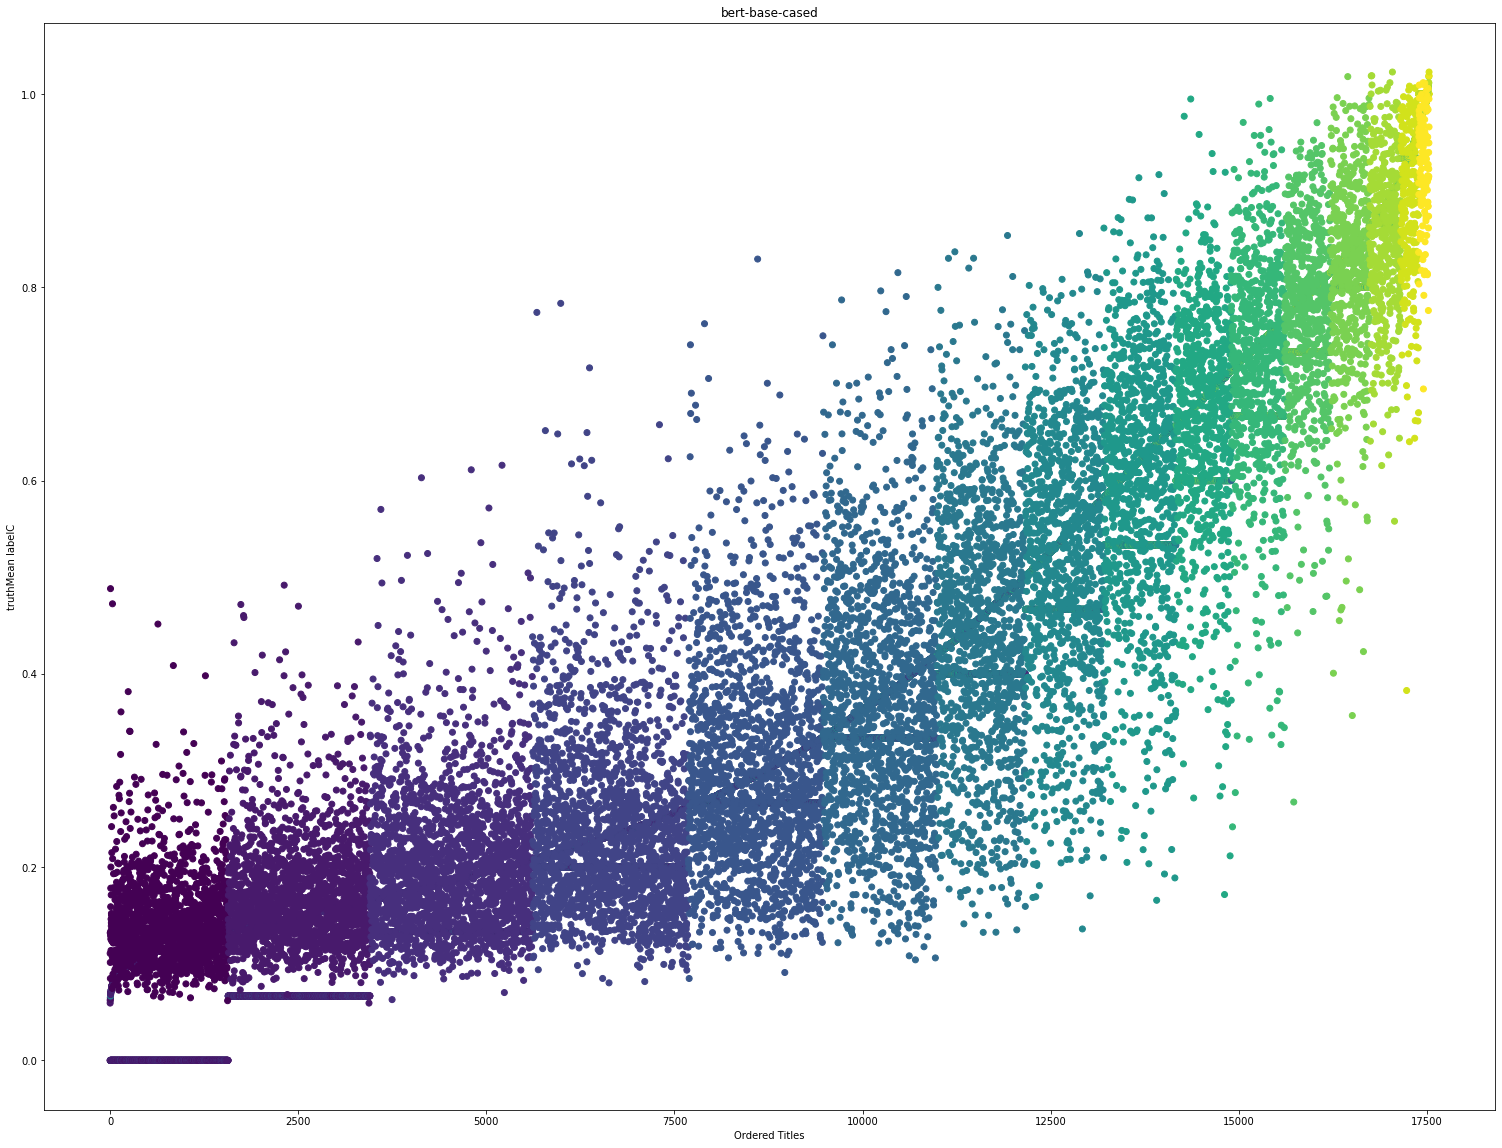

In [72]:
plt.figure(figsize=(26, 20))
plt.title(checkpoint)
plt.xlabel("Ordered Titles")

plt.ylabel(actualOutput + " " + computedOutput)

x = np.array(range(0, tct1.shape[0]))
y = tct1[actualOutput]
plt.scatter(x, y, c = color1, marker = "o", label = "Array elements")

x2 = np.array(range(0, tct2.shape[0]))
y2 = tct2[computedOutput]
plt.scatter(x2, y2, c = color1, marker = "o", label = "Array elements")

x3 = np.array(range(0, tct1.shape[0]))
y3 = tct1[computedOutput]
plt.scatter(x3, y3, c = color2, marker = "o", label = "Array elements")

In [73]:
tct

postText  \
0      A contestant on The Jump has already been forc...   
1      A max deal for...Jrue Holiday? That's how craz...   
2      Leah Remini's Reddit AMA reveals juicy secrets...   
3      This is how @imVkohli won #MichaelClarke's hea...   
4         'Pain in my soul': Russia mourns plane victims   
...                                                  ...   
17524        Finally, proof that not all cats are jerks.   
17525  All NCAA Tournament games will be available on...   
17526  WATCH LIVE: Attorneys of United Airlines passe...   
17527  See Harry Styles hanging from a helicopter on ...   
17528  A.J. Francis, a 6-foot-5, 330-lb Miami Dolphin...   

                                             targetTitle  \
0      The Jump 2017 claims first casualty as Vogue W...   
1      The 10 NBA Free Agents Most Likely to Be Overp...   
2      Leah Remini's Reddit AMA reveals juicy secrets...   
3      This Is How Virat Kohli Won Michael Clarke's H...   
4           Russia mourns as search for bodies continues   
...                                                  ...   
17524  One kitty's cuddly nature proves that not all ...   
17525  How to watch today's March Madness 2017 NCAA t...   
17526  Watch Live: Briefing with Attorneys of United ...   
17527  Harry Styles Hangs From a Helicopter on 'Sign ...   
17528  A.J. Francis, Miami Dolphins defensive tackle,...   

                                       targetDescription  truthMean  \
0      Since it began in 2014, The Jump has made a na...   0.266667   
1      With another salary-cap spike on the way this ...   0.600000   
2      Leah Remini, author of 'Troublemaker: Survivin...   0.533333   
3      Former Aussie skipper Michael Clarke has words...   0.533333   
4      A huge search operation is continuing for a Ru...   0.200000   
...                                                  ...        ...   
17524  Twitter user @fish_size tweeted a picture in w...   0.533333   
17525  Round two of the NCAA basketball tournament st...   0.400000   
17526  Attorneys and a family member for Dr. David Da...   0.600000   
17527  As if the stakes weren't high enough already f...   0.200000   
17528  Dolphins reserve DT A.J. Francis is under cont...   0.333333   

                       id                                          input_ids  \
0      828280526616145921  [101, 138, 11201, 1113, 1109, 18454, 1144, 164...   
1      841715429135532034  [101, 138, 12477, 1775, 2239, 1111, 119, 119, ...   
2      804133678003666946  [101, 14809, 11336, 25685, 112, 188, 2156, 179...   
3      842058017499680769  [101, 1188, 1110, 1293, 137, 13280, 2559, 2718...   
4      813409889355759616  [101, 112, 13304, 1107, 1139, 3960, 112, 131, ...   
...                   ...                                                ...   
17524  851495511517474816  [101, 4428, 117, 6777, 1115, 1136, 1155, 11771...   
17525  843818164756631552  [101, 1398, 5089, 5629, 1638, 1209, 1129, 1907...   
17526  852537522945220609  [101, 22751, 9481, 3048, 149, 26140, 131, 6867...   
17527  849403739664527361  [101, 3969, 3466, 27881, 5205, 1121, 170, 7948...   
17528  608310131734872064  [101, 138, 119, 147, 119, 3720, 117, 170, 127,...   

                                          token_type_ids  \
0      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
...                                                  ...   
17524            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
17525  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
17526  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
17527  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
17528  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                          attention_mask    labels    l

In [75]:
tct[[computedOutput, actualOutput]].describe()

labelC     truthMean
count  17529.000000  17529.000000
mean       0.388661      0.329443
std        0.244480      0.251504
min        0.059281      0.000000
25%        0.182627      0.133333
50%        0.301582      0.266667
75%        0.578221      0.466667
max        1.022761      1.000000

In [76]:
tct.corr()

truthMean    labels    labelC
truthMean   1.000000  1.000000  0.906419
labels      1.000000  1.000000  0.906419
labelC      0.906419  0.906419  1.000000

In [77]:
from transformers import pipeline

In [78]:
model.to(torch.device("cpu"))

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [79]:
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [80]:
classifier

In [81]:
classifier("Nous sommes tr√®s heureux de vous pr√©senter la biblioth√®que ü§ó Transformers.")

[{'label': 'LABEL_0', 'score': 0.6280205249786377}]

In [82]:
classifier(["The key to truly great chicken soup", "La clef d'une bonne soupe au poulet"])

Disabling tokenizer parallelism, we're using DataLoader multithreading already


[{'label': 'LABEL_0', 'score': 0.6771584153175354},
 {'label': 'LABEL_0', 'score': 0.6571547389030457}]

In [83]:
classifier("Trait√© de math√©matiques amusantes.")

[{'label': 'LABEL_0', 'score': 0.6587210297584534}]

In [84]:
tct.loc[tct.labelC != tct.labels]

postText  \
0      A contestant on The Jump has already been forc...   
1      A max deal for...Jrue Holiday? That's how craz...   
2      Leah Remini's Reddit AMA reveals juicy secrets...   
3      This is how @imVkohli won #MichaelClarke's hea...   
4         'Pain in my soul': Russia mourns plane victims   
...                                                  ...   
17524        Finally, proof that not all cats are jerks.   
17525  All NCAA Tournament games will be available on...   
17526  WATCH LIVE: Attorneys of United Airlines passe...   
17527  See Harry Styles hanging from a helicopter on ...   
17528  A.J. Francis, a 6-foot-5, 330-lb Miami Dolphin...   

                                             targetTitle  \
0      The Jump 2017 claims first casualty as Vogue W...   
1      The 10 NBA Free Agents Most Likely to Be Overp...   
2      Leah Remini's Reddit AMA reveals juicy secrets...   
3      This Is How Virat Kohli Won Michael Clarke's H...   
4           Russia mourns as search for bodies continues   
...                                                  ...   
17524  One kitty's cuddly nature proves that not all ...   
17525  How to watch today's March Madness 2017 NCAA t...   
17526  Watch Live: Briefing with Attorneys of United ...   
17527  Harry Styles Hangs From a Helicopter on 'Sign ...   
17528  A.J. Francis, Miami Dolphins defensive tackle,...   

                                       targetDescription  truthMean  \
0      Since it began in 2014, The Jump has made a na...   0.266667   
1      With another salary-cap spike on the way this ...   0.600000   
2      Leah Remini, author of 'Troublemaker: Survivin...   0.533333   
3      Former Aussie skipper Michael Clarke has words...   0.533333   
4      A huge search operation is continuing for a Ru...   0.200000   
...                                                  ...        ...   
17524  Twitter user @fish_size tweeted a picture in w...   0.533333   
17525  Round two of the NCAA basketball tournament st...   0.400000   
17526  Attorneys and a family member for Dr. David Da...   0.600000   
17527  As if the stakes weren't high enough already f...   0.200000   
17528  Dolphins reserve DT A.J. Francis is under cont...   0.333333   

                       id                                          input_ids  \
0      828280526616145921  [101, 138, 11201, 1113, 1109, 18454, 1144, 164...   
1      841715429135532034  [101, 138, 12477, 1775, 2239, 1111, 119, 119, ...   
2      804133678003666946  [101, 14809, 11336, 25685, 112, 188, 2156, 179...   
3      842058017499680769  [101, 1188, 1110, 1293, 137, 13280, 2559, 2718...   
4      813409889355759616  [101, 112, 13304, 1107, 1139, 3960, 112, 131, ...   
...                   ...                                                ...   
17524  851495511517474816  [101, 4428, 117, 6777, 1115, 1136, 1155, 11771...   
17525  843818164756631552  [101, 1398, 5089, 5629, 1638, 1209, 1129, 1907...   
17526  852537522945220609  [101, 22751, 9481, 3048, 149, 26140, 131, 6867...   
17527  849403739664527361  [101, 3969, 3466, 27881, 5205, 1121, 170, 7948...   
17528  608310131734872064  [101, 138, 119, 147, 119, 3720, 117, 170, 127,...   

                                          token_type_ids  \
0      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
...                                                  ...   
17524            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
17525  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
17526  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
17527  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
17528  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                          attention_mask    labels    l

In [85]:
classifier("99% des gens n'arrivent pas √† voir le chien sur cette image", return_all_scores=True)

[[{'label': 'LABEL_0', 'score': 0.6506125330924988}]]